In [9]:
import numpy as np
import pandas as pd


In [10]:
df=pd.read_csv("imports-85.csv")

In [13]:
df.columns=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [19]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [15]:
df=df.replace("?",np.nan)

In [18]:
df.isnull().sum().sort_values(ascending=False)

normalized-losses    40
price                 4
stroke                4
bore                  4
peak-rpm              2
num-of-doors          2
horsepower            2
engine-type           0
highway-mpg           0
city-mpg              0
compression-ratio     0
fuel-system           0
engine-size           0
num-of-cylinders      0
symboling             0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
curb-weight           0
dtype: int64

In [23]:
df.dropna(subset=['price'],axis=0,inplace=True)

In [27]:
avg_normalized=df['normalized-losses'].astype("float").mean()
avg_stroke=df['stroke'].astype("float").mean()
avg_bore=df['bore'].astype("float").mean()
avg_horsepower=df['horsepower'].astype("float").mean()
avg_peak=df['peak-rpm'].astype("float").mean()

In [28]:
df['normalized-losses']=df['normalized-losses'].replace(np.nan,avg_normalized)
df['stroke']=df['stroke'].replace(np.nan,avg_stroke)
df['bore']=df['bore'].replace(np.nan,avg_bore)
df['horsepower']=df['horsepower'].replace(np.nan,avg_horsepower)
df['peak-rpm']=df['peak-rpm'].replace(np.nan,avg_peak)

In [30]:
df['num-of-doors'].value_counts()

four    113
two      85
Name: num-of-doors, dtype: int64

In [31]:
df['num-of-doors']=df['num-of-doors'].replace(np.nan,"four")

In [32]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [33]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
10,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


In [35]:
df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']]=df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']].astype("float")

In [40]:
df['city-mpg']=235/df['city-mpg']
df['highway-mpg']=235/df['highway-mpg']

In [41]:
max_height=df['height'].max()
max_length=df['length'].max()
max_width=df['width'].max()

In [42]:
df['height']=df['height']/max_height
df['length']=df['length']/max_length
df['width']=df['width']/max_width

In [44]:
df[['length','width','height']]

,length,width,height
0,0.811148,0.890278,0.816054
1,0.822681,0.909722,0.876254
2,0.848630,0.919444,0.908027
3,0.848630,0.922222,0.908027
4,0.851994,0.920833,0.887960
...,...,...,...
199,0.907256,0.956944,0.928094
200,0.907256,0.955556,0.928094
201,0.907256,0.956944,0.928094
202,0.907256,0.956944,0.928094


In [47]:
min(df['horsepower']),max(df['horsepower'])

(48.0, 262.0)

In [51]:
group_names=['Low','Medium','High']
bins=np.linspace(min(df['horsepower']),max(df['horsepower']),num=4)

In [52]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Low
1,154.0,Medium
2,102.0,Low
3,115.0,Low
4,110.0,Low
5,110.0,Low
6,110.0,Low
7,140.0,Medium
9,101.0,Low
10,101.0,Low


In [58]:
from matplotlib import pyplot

(array([53.,  5.,  1.]),
 array([ 1.,  7., 13., 19.]),
 <BarContainer object of 3 artists>)

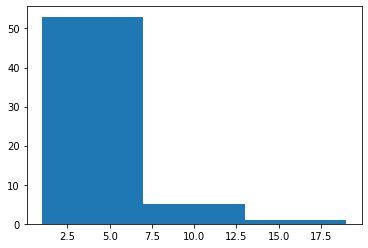

In [65]:
pyplot.hist(df['horsepower'].value_counts(),bins=3)

In [67]:
dummy_variable=pd.get_dummies(df['fuel-type'])

In [77]:
dummy_variable.rename(columns={"Fuel-type:Disel":'disel',"Fuel-type:Gas":'gas'},inplace=True)

In [79]:
df=pd.concat([df,dummy_variable],axis=1)

In [81]:
df.drop('fuel-type',axis=1,inplace=True)

In [83]:
dummy=pd.get_dummies(df['aspiration'])

In [86]:
df=pd.concat([df,dummy],axis=1)

In [87]:
df.drop('aspiration',axis=1,inplace=True)

In [88]:
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,std,turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
1,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154.0,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
2,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102.0,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
3,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115.0,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0
4,2,122.0,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,110.0,5500.0,12.368421,9.400000,15250.0,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,114.0,5400.0,10.217391,8.392857,16845.0,Low,0,1,1,0
200,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,160.0,5300.0,12.368421,9.400000,19045.0,Medium,0,1,0,1
201,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,134.0,5500.0,13.055556,10.217391,21485.0,Medium,0,1,1,0
202,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,106.0,4800.0,9.038462,8.703704,22470.0,Low,1,0,0,1


In [89]:
df.to_csv("Clean_automobile.csv")